<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек,-открытие-и-изучение-файла" data-toc-modified-id="Подключение-библиотек,-открытие-и-изучение-файла-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек, открытие и изучение файла</a></span></li><li><span><a href="#Проверка-правильности-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-правильности-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности расчета эффективности обогащения</a></span></li><li><span><a href="#Сравнение-обучающей-и-тестовой-выборок" data-toc-modified-id="Сравнение-обучающей-и-тестовой-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Сравнение обучающей и тестовой выборок</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-изменения-параметра-концентрации" data-toc-modified-id="Оценка-изменения-параметра-концентрации-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Оценка изменения параметра концентрации</a></span></li><li><span><a href="#Оценка-изменения-параметра-размера-гранул" data-toc-modified-id="Оценка-изменения-параметра-размера-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Оценка изменения параметра размера гранул</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Обозначаем-целевые-признаки-признаки" data-toc-modified-id="Обозначаем-целевые-признаки-признаки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обозначаем целевые признаки признаки</a></span></li><li><span><a href="#Прописываем-sMAPE" data-toc-modified-id="Прописываем-sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Прописываем sMAPE</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

### Подключение библиотек, открытие и изучение файла

In [131]:
! /Library/Frameworks/Python.framework/Versions/3.13/bin/python3.13 -m pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [132]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [133]:
gold_recovery_full = pd.read_csv('study_datasets/gold_recovery_full_new.csv')

gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'], format = '%Y-%m-%d %H:%M:%S')
display(gold_recovery_full.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [134]:
# Открываем файл
gold_recovery_tr = pd.read_csv('study_datasets/gold_recovery_train_new.csv')

# Выводим общую информацию о данных
gold_recovery_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [135]:
# Выводим таблицу, чтобы оценить в целом данные, а также обращаем внимание на стобец date 
display(gold_recovery_tr)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [136]:
# Меняем тип данных столбца date 
gold_recovery_tr['date'] = pd.to_datetime(gold_recovery_tr['date'], format = '%Y-%m-%d %H:%M:%S')

# Проверка
gold_recovery_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [137]:
# Переводим дату в соответствующий формат данных 
gold_recovery_test = pd.read_csv('study_datasets/gold_recovery_test_new.csv')
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'], format = '%Y-%m-%d %H:%M:%S')
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

### Проверка правильности расчета эффективности обогащения

In [138]:
rougher_output_concentrate_au = gold_recovery_tr['rougher.output.concentrate_au']
rougher_input_feed_au = gold_recovery_tr['rougher.input.feed_au']
rougher_output_tail_au = gold_recovery_tr['rougher.output.tail_au']
rougher_output_recovery = gold_recovery_tr['rougher.output.recovery']
rougher_output_recovery_calc = rougher_output_concentrate_au * (rougher_input_feed_au - rougher_output_tail_au) / rougher_input_feed_au / (rougher_output_concentrate_au - rougher_output_tail_au) * 100
print('MAE =', mean_absolute_error(rougher_output_recovery, rougher_output_recovery_calc))

MAE = 1.0748911125799084e-14


Значение средней абсолютной ошибки крайне мало. Значение, представленное в таблице рассчитано верно, можно продолжать исследование.

### Сравнение обучающей и тестовой выборок

В тестовой выброке отсутствуют все столбцы, данные которых касатются финальных значений после процесса (все столбцы с названиями типа "-----.output.-----"). Следовательно, их при дальнейшем построении моделей - не рассматриваем в качестве признака.

Отсутствующие в тестовой выборке столбцы включают данные, которые невозможно получить до реализации каждой отдельной стадии процесса. То есть, в тестовой выборке только исходные данные, отсутствуют данные о результатах процесса.

### Предобработка данных

In [139]:
# Заполняем ближайшими значениями 
gold_recovery_tr = gold_recovery_tr.fillna(method = 'bfill')
# gold_recovery_tr.bfill() - не работает 
# Проверка
gold_recovery_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

/var/folders/81/9w5c_xxd2ls4mkwjtz5p891c0000gn/T/ipykernel_1077/780160858.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_recovery_tr = gold_recovery_tr.fillna(method = 'bfill')


Получается, что разом удаляется 22% данных. Может быть иммет смысл заполнить пропуски значениями из ближайщих ячеек, так как все равно ближайщие значения могут быть очень похожи, что указано в предпроектном описании данных. 

In [140]:
# Также поступим и с тестовой выборкой
gold_recovery_test = gold_recovery_test.fillna(method = 'bfill')

# gold_recovery_test.bfill() - не работает 

# Проверка
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

/var/folders/81/9w5c_xxd2ls4mkwjtz5p891c0000gn/T/ipykernel_1077/3142389320.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_recovery_test = gold_recovery_test.fillna(method = 'bfill')


## Анализ данных

### Оценка изменения параметра концентрации 

Для оценки адекватности данных проведем их визуализацию.

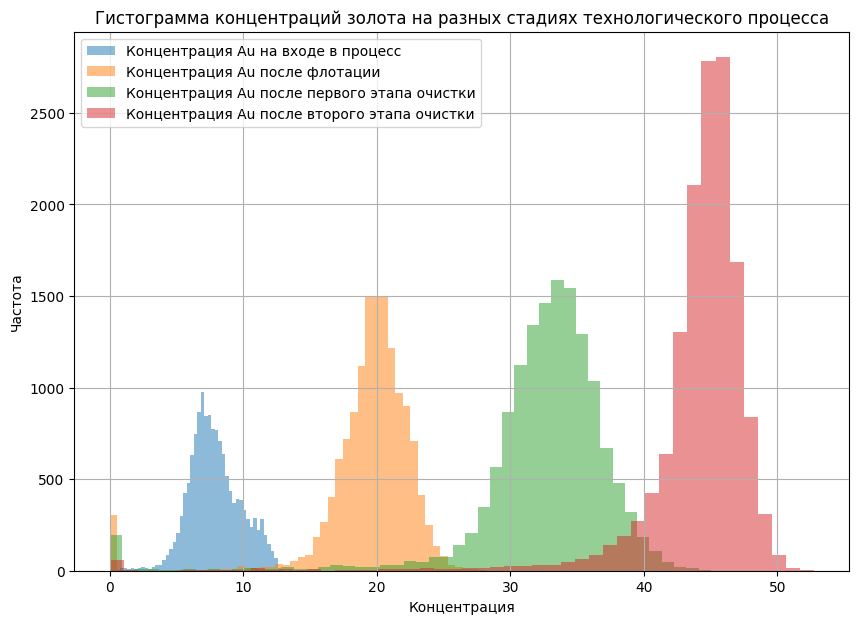

In [141]:
# Диаграммы распределения концентрации золота в целевом продукте на разных стадяих обработки
plt.figure(figsize = (10,7))

gold_recovery_tr['rougher.input.feed_au'].hist(bins = 50, label = 'Концентрация Au на входе в процесс', alpha = 0.5)
gold_recovery_tr['rougher.output.concentrate_au'].hist(bins = 50, label = 'Концентрация Au после флотации', alpha = 0.5)
gold_recovery_tr['primary_cleaner.output.concentrate_au'].hist(bins = 50, label = 'Концентрация Au после первого этапа очистки', alpha = 0.5)
gold_recovery_tr['final.output.concentrate_au'].hist(bins = 50, label = 'Концентрация Au после второго этапа очистки', alpha = 0.5)

plt.title('Гистограмма концентраций золота на разных стадиях технологического процесса')
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.legend(loc = 'upper left')

plt.show()

На совмещенной гистограме видно, что во всех случаях распределение близко к нормальному. Но также видно как коцентрации после флотации, после первого, а также после второго этапа очистки, есть аномальные значения, меньше 1 (предположительно, по графику).
Предлагается подсчитать такие значения и убрать их из датасета. 

In [142]:
# Исключим значения 
print(gold_recovery_tr[gold_recovery_tr['rougher.input.feed_au'] < 1]['rougher.input.feed_au'].count())
print(gold_recovery_tr[gold_recovery_tr['rougher.output.concentrate_au'] < 1]['rougher.output.concentrate_au'].count())
print(gold_recovery_tr[gold_recovery_tr['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count())
print(gold_recovery_tr[gold_recovery_tr['final.output.concentrate_au'] < 1]['final.output.concentrate_au'].count())

19
303
199
59


Так как количество не значительно относительно общей выборки, предлагается исключить данные значения. Чтобы исключить искажения при дальшейшем построении моделей.

In [143]:
# Удаляем значания меньше 1 в рассмотренных выше столбцах
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['rougher.input.feed_au'] > 1]
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['rougher.output.concentrate_au'] > 1]
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['primary_cleaner.output.concentrate_au'] > 1]
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['final.output.concentrate_au'] > 1]

In [144]:
# Проверка
print(gold_recovery_tr[gold_recovery_tr['rougher.input.feed_au'] < 1]['rougher.input.feed_au'].count())
print(gold_recovery_tr[gold_recovery_tr['rougher.output.concentrate_au'] < 1]['rougher.output.concentrate_au'].count())
print(gold_recovery_tr[gold_recovery_tr['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count())
print(gold_recovery_tr[gold_recovery_tr['final.output.concentrate_au'] < 1]['final.output.concentrate_au'].count())

0
0
0
0


In [145]:
# Удаляем значания меньше 1 в рассмотренных выше столбцах
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['rougher.input.feed_au'] < 20]
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['rougher.output.concentrate_au'] > 10]
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['primary_cleaner.output.concentrate_au'] > 15]
gold_recovery_tr = gold_recovery_tr[gold_recovery_tr['final.output.concentrate_au'] > 20]

Проведем аналогичные исследования для серебра (Ag) и свинца (Pb).

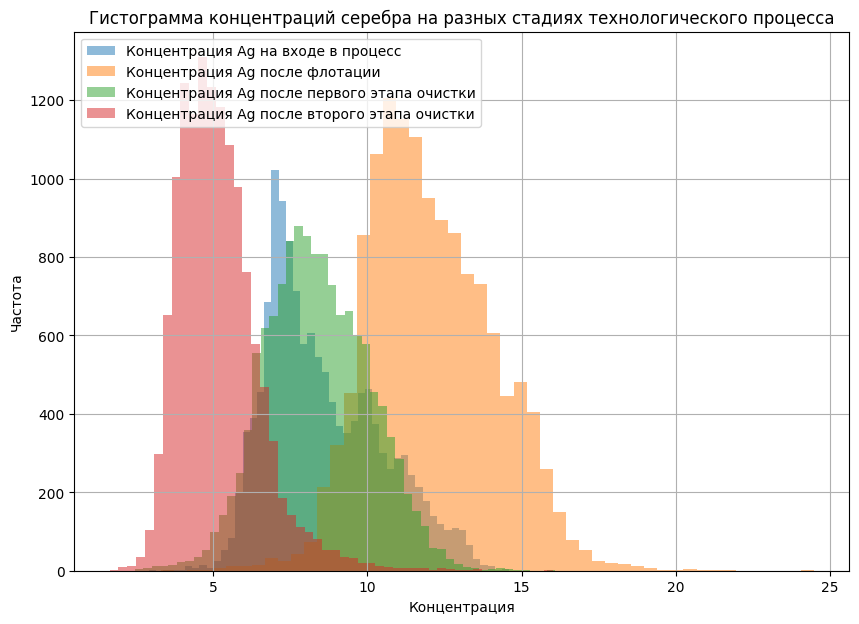

In [146]:
# Диаграммы распределения концентрации серебра в целевом продукте на разных стадяих обработки
plt.figure(figsize = (10,7))

gold_recovery_tr['rougher.input.feed_ag'].hist(bins = 50, label = 'Концентрация Ag на входе в процесс', alpha = 0.5)
gold_recovery_tr['rougher.output.concentrate_ag'].hist(bins = 50, label = 'Концентрация Ag после флотации', alpha = 0.5)
gold_recovery_tr['primary_cleaner.output.concentrate_ag'].hist(bins = 50, label = 'Концентрация Ag после первого этапа очистки', alpha = 0.5)
gold_recovery_tr['final.output.concentrate_ag'].hist(bins = 50, label = 'Концентрация Ag после второго этапа очистки', alpha = 0.5)

plt.title('Гистограмма концентраций серебра на разных стадиях технологического процесса')
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.legend(loc = 'upper left')

plt.show()

Из гистрограммы видно, что серебро - не целевой продукт. Так как в результате технологического процесса концентрация серебра не растет. Выбросы были, скорее всего убраны на этапе обработки данных о концентрациях золота. 

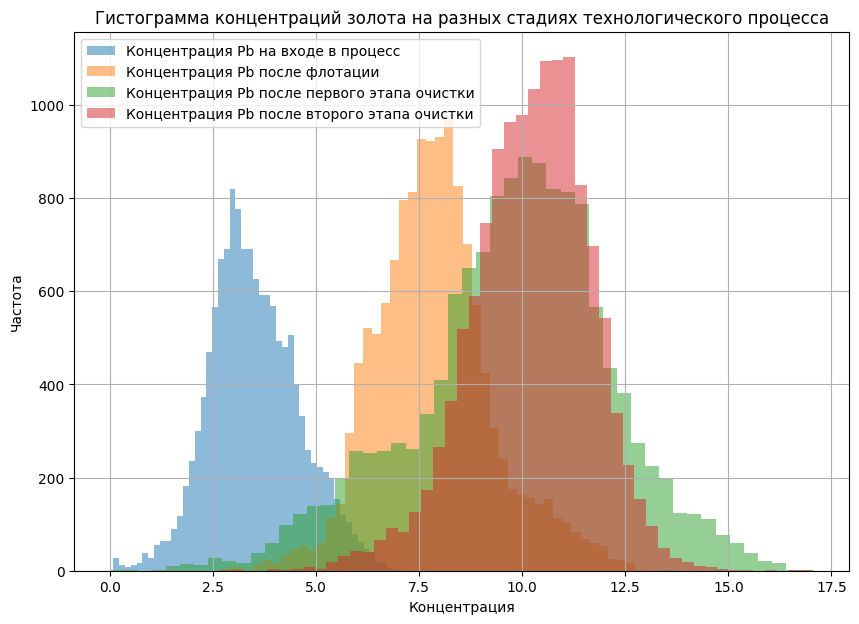

In [147]:
# Диаграммы распределения концентрации золота в целевом продукте на разных стадяих обработки
plt.figure(figsize = (10,7))

gold_recovery_tr['rougher.input.feed_pb'].hist(bins = 50, label = 'Концентрация Pb на входе в процесс', alpha = 0.5)
gold_recovery_tr['rougher.output.concentrate_pb'].hist(bins = 50, label = 'Концентрация Pb после флотации', alpha = 0.5)
gold_recovery_tr['primary_cleaner.output.concentrate_pb'].hist(bins = 50, label = 'Концентрация Pb после первого этапа очистки', alpha = 0.5)
gold_recovery_tr['final.output.concentrate_pb'].hist(bins = 50, label = 'Концентрация Pb после второго этапа очистки', alpha = 0.5)

plt.title('Гистограмма концентраций золота на разных стадиях технологического процесса')
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.legend(loc = 'upper left')

plt.show()

Концентрация свинца растет, но рост не такой выраженный, как у золота, так как продукт не целевой. Выбросы были убраны на этапе обработки ранее. 

### Оценка изменения параметра размера гранул

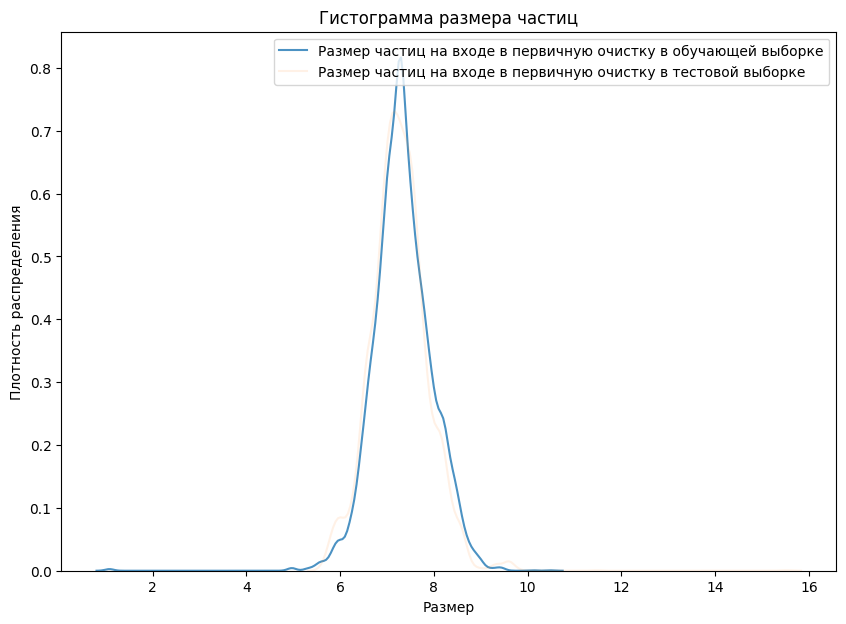

In [148]:
# Диаграммы распределения размера частиц в целевом продукте на стадии первичной очистки
plt.figure(figsize = (10,7))

#gold_recovery_tr_size = gold_recovery_tr['rougher.input.feed_size']
sns.kdeplot(data=gold_recovery_tr, x='primary_cleaner.input.feed_size', common_norm=False, alpha = 0.8, \
            label = 'Размер частиц на входе в первичную очистку в обучающей выборке')
sns.kdeplot(data=gold_recovery_test, x='primary_cleaner.input.feed_size', common_norm=False, alpha = 0.1, \
            label = 'Размер частиц на входе в первичную очистку в тестовой выборке')


plt.title('Гистограмма размера частиц')
plt.xlabel('Размер')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show()

In [149]:
print(gold_recovery_tr['primary_cleaner.input.feed_size'].describe())
print(gold_recovery_test['primary_cleaner.input.feed_size'].describe())

count    13357.00000
mean         7.33244
std          0.61531
min          1.08000
25%          6.97000
50%          7.30000
75%          7.70000
max         10.47000
Name: primary_cleaner.input.feed_size, dtype: float64
count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64


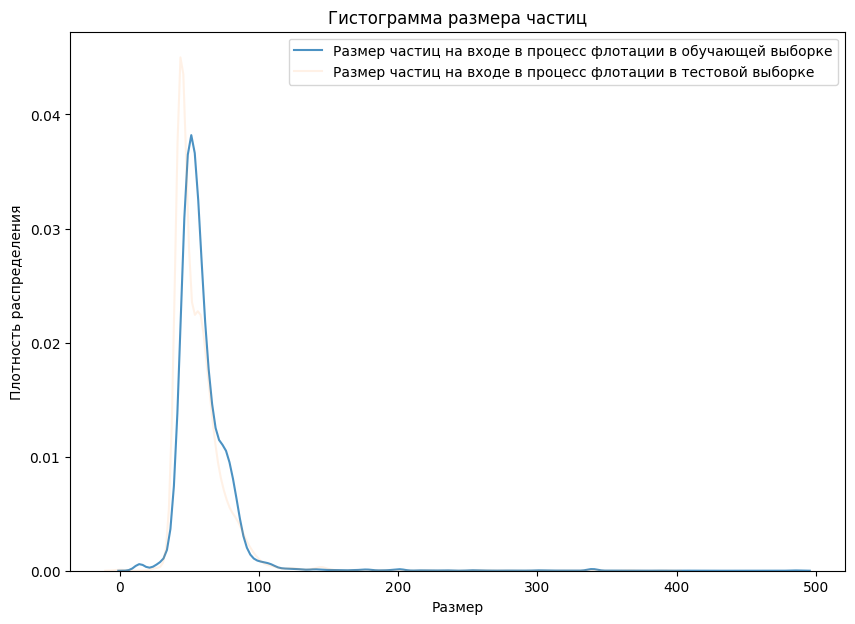

In [150]:
# Диаграммы распределения размера частиц в целевом продукте на стадии флотации
plt.figure(figsize = (10,7))

sns.kdeplot(data=gold_recovery_tr, x='rougher.input.feed_size', common_norm=False, alpha = 0.8, \
            label = 'Размер частиц на входе в процесс флотации в обучающей выборке')
sns.kdeplot(data=gold_recovery_test, x='rougher.input.feed_size', common_norm=False, alpha = 0.1, \
            label = 'Размер частиц на входе в процесс флотации в тестовой выборке')


plt.title('Гистограмма размера частиц')
plt.xlabel('Размер')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show()

In [151]:
print(gold_recovery_tr['rougher.input.feed_size'].describe())
print(gold_recovery_test['rougher.input.feed_size'].describe())

count    13357.000000
mean        59.911872
std         23.511209
min          9.659576
25%         48.969158
50%         55.276338
75%         65.606651
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    5290.000000
mean       55.952917
std        19.080412
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


Среднее, а также первый, второй и третий квартили по обеим выборкам (train и test) очень похожи и для процесса первичной очистки, и для флотации.

In [152]:
# Концентрация металлов в сырье 

au_ag_pb_feed = gold_recovery_tr[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_au']].sum(axis=1)

print(au_ag_pb_feed)

0        14.871440
1        14.905729
2        14.638299
3        14.199305
4        13.511497
           ...    
14144    16.045275
14145    15.104931
14146    14.515579
14147    14.313448
14148    14.399936
Length: 13357, dtype: float64


In [153]:
# Концентрация металлов в черновом концентрате
au_ag_pb_rougher = gold_recovery_tr[['rougher.output.concentrate_au', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_pb']].sum(axis=1)
print(au_ag_pb_rougher)

0        38.395653
1        38.945647
2        38.649756
3        38.411473
4        38.867359
           ...    
14144    40.712449
14145    40.755632
14146    32.589863
14147    40.148948
14148    40.465768
Length: 13357, dtype: float64


In [154]:
# Концентрация металлов в черновом концентрате
au_ag_pb_primary = gold_recovery_tr[['primary_cleaner.output.concentrate_au', 
                   'primary_cleaner.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_pb']].sum(axis=1)
print(au_ag_pb_primary)

0        53.111627
1        53.174338
2        52.927464
3        43.979185
4        52.121146
           ...    
14144    51.945355
14145    52.161648
14146    51.619196
14147    50.273714
14148    49.544487
Length: 13357, dtype: float64


In [155]:
# Концентрация металлов в финальном концентрате
au_ag_pb_final = gold_recovery_tr[['final.output.concentrate_au', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_pb']].sum(axis=1)
print(au_ag_pb_final)

0        58.137072
1        58.699942
2        58.927421
3        58.714815
4        59.065251
           ...    
14144    61.295107
14145    61.412113
14146    61.340054
14147    61.401016
14148    61.635645
Length: 13357, dtype: float64


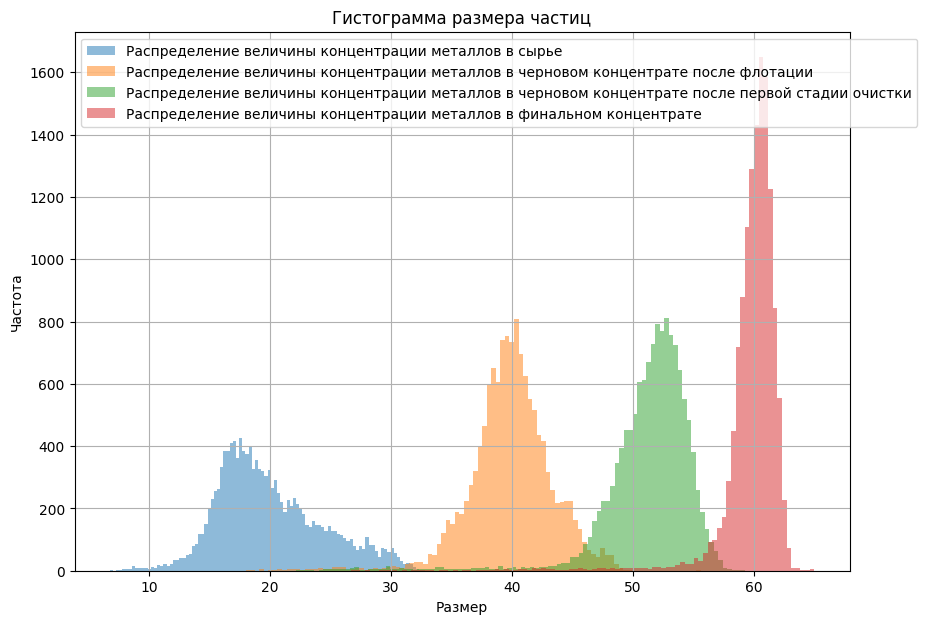

In [156]:
# Гистограмма концентрации металлов в финальном концентрате
plt.figure(figsize = (10,7))

au_ag_pb_feed.hist(bins = 100, label = 'Распределение величины концентрации металлов в сырье', alpha = 0.5)
au_ag_pb_rougher.hist(bins = 100, label = 'Распределение величины концентрации металлов в черновом концентрате после флотации', alpha = 0.5)
au_ag_pb_primary.hist(bins = 100, label = 'Распределение величины концентрации металлов в черновом концентрате после первой стадии очистки', alpha = 0.5)
au_ag_pb_final.hist(bins = 100, label = 'Распределение величины концентрации металлов в финальном концентрате', alpha = 0.5)

plt.title('Гистограмма размера частиц')
plt.xlabel('Размер')
plt.ylabel('Частота')
plt.legend(loc = 'upper left')
plt.show()

Распределение значений величины концентраций металлов в сырье для разных стадий технологического процессе нормальное, и в целом наблюдается тенденция к росту концентрации в резальльтате процесса обогащения. Основной вклад в рост концентрации, исходя из ранее исследованных данных вносит золото. 

## Модель

### Обозначаем целевые признаки признаки

In [157]:
#Определим признаки, которые не войдут в обучающую выборку

def select_columns_by_keywords(data, keywords):
    
    # Проверяем, содержится ли шаблон (keywords) в названии столбцов (| для обозначения "или")
    mask = data.columns.str.contains('|'.join(keywords), case=False)
    # Создаем новый датафрейм со столбцами, выбранными по условию
    return data.loc[:, mask]

keywods = ['date', 'output', 'calculation']
gold_recovery_train_out_01 = select_columns_by_keywords(gold_recovery_tr,keywods)

print("Columns containing specific words:", gold_recovery_train_out_01)

Columns containing specific words:                      date  final.output.concentrate_ag  \
0     2016-01-15 00:00:00                     6.055403   
1     2016-01-15 01:00:00                     6.029369   
2     2016-01-15 02:00:00                     6.055926   
3     2016-01-15 03:00:00                     6.047977   
4     2016-01-15 04:00:00                     6.148599   
...                   ...                          ...   
14144 2018-08-18 06:59:59                     3.224920   
14145 2018-08-18 07:59:59                     3.195978   
14146 2018-08-18 08:59:59                     3.109998   
14147 2018-08-18 09:59:59                     3.367241   
14148 2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                      5.383759

In [158]:
gold_recovery_target = gold_recovery_tr[['rougher.output.recovery', 'final.output.recovery']]

display(gold_recovery_target)

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
14144,89.574376,73.755150
14145,87.724007,69.049291
14146,88.890579,67.002189
14147,89.858126,65.523246


In [159]:
# Добавляем в тестовую выборку отсутствующие данные из обучающей выборки
merge_train_test = gold_recovery_full[['date','rougher.output.recovery','final.output.recovery']]
gold_recovery_test = gold_recovery_test.merge(merge_train_test, on='date', how='left')



print(gold_recovery_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [160]:
# Разделяем на выборки для обучения и валидационную выборку:
gold_recovery_train, gold_recovery_valid = train_test_split(gold_recovery_tr, test_size=0.25, random_state=12345)

In [161]:
# Определяем целевой признак и параметры для обучающей выборки
features_train = gold_recovery_train.drop(gold_recovery_train_out_01, axis = 1)
target_train_rougher = gold_recovery_train[['rougher.output.recovery']]
target_train_final = gold_recovery_train[['final.output.recovery']]

# Определяем целевой признак и параметры для валидационной выборки
features_test = gold_recovery_test.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
target_test_rougher = gold_recovery_test[['rougher.output.recovery']]
target_test_final = gold_recovery_test[['final.output.recovery']]

# Определяем целевой признак и параметры для тествоой выборки
features_valid = gold_recovery_valid.drop(gold_recovery_train_out_01, axis = 1)
target_valid_rougher = gold_recovery_valid[['rougher.output.recovery']]
target_valid_final = gold_recovery_valid[['final.output.recovery']]

# Проверка

print(features_train.shape)
print(target_train_rougher.shape)
print(features_test.shape)
print(target_test_rougher.shape)
print(features_valid.shape)
print(target_valid_rougher.shape)

(10017, 52)
(10017, 1)
(5290, 52)
(5290, 1)
(3340, 52)
(3340, 1)


### Прописываем sMAPE

In [162]:
def sMAPE(recovery_given_rougher, recovery_pred_rougher, recovery_given_final, recovery_pred_final):
    def calculate_smape(given_values, pred_values):
        return np.mean(abs(given_values - pred_values) / ((abs(given_values) + abs(pred_values)) / 2)) * 100

    # Оценка по этапам
    smape_rougher = calculate_smape(recovery_given_rougher, recovery_pred_rougher)
    smape_final = calculate_smape(recovery_given_final, recovery_pred_final)

    # Общая оценка
    smape = smape_rougher * 0.25 + smape_final * 0.75
    return smape

### Модель дерева решений

In [163]:
# Модель дерева решений
best_model_rougher = None
best_model_final = None
best_result = 1000
best_depth = 0
for depth in range(1,6):
    
    model_rougher = DecisionTreeRegressor(max_depth=depth,random_state=12345) # запуск модели DecisionTreeRegressor с параметром random_state=12345 и max_depth=depth
    model_final = DecisionTreeRegressor(max_depth=depth,random_state=12345) # запуск модели DecisionTreeRegressor с параметром random_state=12345 и max_depth=depth

    model_rougher.fit(features_train, target_train_rougher) # обучение модели
    model_final.fit(features_train, target_train_final) # обучение модели
    
    predictions_valid_rougher = model_rougher.predict(features_valid) # получение предсказания модели на валидационной выборке
    predictions_valid_final = model_final.predict(features_valid) # получение предсказания модели на валидационной выборке
    
    result = sMAPE(target_valid_rougher.to_numpy(), predictions_valid_rougher, target_valid_final.to_numpy(), predictions_valid_final)

    if result < best_result:
        best_model_rougher = model_rougher
        best_model_final = model_final
        best_result = result
        best_depth = depth
        
print('sMAPE лучшей модели:', best_result)
print('глубина лучшей модели:', best_depth)
        

sMAPE лучшей модели: 10.132082424678604
глубина лучшей модели: 1


### Модель линейной регрессии

In [164]:
model_lineral_regression_rougher = LinearRegression()# запуск модели LinearRegression
model_lineral_regression_rougher.fit(features_train, target_train_rougher) # обучение модели 
predictions_valid_rougher = model_lineral_regression_rougher.predict(features_valid) # получение предсказания модели на валидационной выборке


In [165]:
model_lineral_regression_final = LinearRegression()# запуск модель LinearRegression
model_lineral_regression_final.fit(features_train,target_train_final) # обучение модели
predictions_valid_final = model_lineral_regression_final.predict(features_valid) # получание предсказания модели на валидационной выборке


In [166]:
# Получаем  предсказания модели на валидационной выборке

Results = sMAPE(target_valid_rougher.to_numpy(), predictions_valid_rougher, target_valid_final.to_numpy(), predictions_valid_final)

print('sMAPE:',Results)

sMAPE: 7.097541730120179


### Модель случайного леса

In [167]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
       
        model_rougher = RandomForestRegressor(max_depth=depth,n_estimators=est, random_state=12345)# запуск модели RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
        model_final = RandomForestRegressor(max_depth=depth,n_estimators=est, random_state=12345)# запуск моделм RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
        
        model_rougher.fit(features_train, target_train_rougher.values.ravel()) # обучение модели
        model_final.fit(features_train, target_train_final.values.ravel()) # обучение модели
        
        predictions_valid_rougher = model_rougher.predict(features_valid) # получение предсказания модели на валидационной выборке
        predictions_valid_final = model_final.predict(features_valid) # получение предсказания модели на валидационной выборке
        
        result = sMAPE(target_valid_rougher.to_numpy(), predictions_valid_rougher, target_valid_final.to_numpy(), predictions_valid_final)
      
        if result < best_result:
            best_model_rougher = model_rougher
            best_model_final
            best_result = result
            best_est = est
            best_depth = depth

print("sMAPE лучшей модели:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

sMAPE лучшей модели: 10.013217271553527 Количество деревьев: 10 Максимальная глубина: 10


**ВЫВОД:** из выбранных для обучения моделей лучшие результаты sMAPE показала модель линейной регресии. 

### Проверка лучшей модели на тестовой выборке

In [168]:
# Тестируем лушую модель
predictions_test_rougher = model_lineral_regression_rougher.predict(features_test)
predictions_test_final = model_lineral_regression_final.predict(features_test)

results = sMAPE(target_test_rougher.to_numpy(), predictions_test_rougher, target_test_final.to_numpy(), predictions_test_final)

print(results)

9.524089116169856


**ВЫВОД:** Значение sMAPE < 10%, что свидельствует о высоком качестве прогноза. Лучшая модель - модель линейной регрессии. 

In [169]:
# Дамми модель для сравнения на валидационном наборе
dummy_regressor_rougher = DummyRegressor(strategy="mean")
dummy_regressor_rougher.fit(features_train, target_train_rougher.values.ravel())
dummy_pred_valid_rougher = dummy_regressor_rougher.predict(features_valid)

dummy_regressor_final = DummyRegressor(strategy="mean")
dummy_regressor_final.fit(features_train, target_train_final.values.ravel())
dummy_pred_valid_final = dummy_regressor_final.predict(features_valid)

results = sMAPE(target_valid_rougher.to_numpy(), dummy_pred_valid_rougher, target_valid_final.to_numpy(), dummy_pred_valid_final)
print(results)

9.27960975109891


**ВЫВОД:** Значение sMAPE < 10%, что свидельствует о высоком качестве прогноза. Лучшая модель - модель линейной регрессии. Различие в sMAPE линейной регрессии и случайной модели (DummyRegressor) составляет 2,5%, чем можно принебречь.

*Планируемые улучшения:* применение кросс-валидации для снижения sMAPE (лучшая модель < случайной)